In this notebook, we present various usecases to interact with ptype to handle:

- incorrect column type predictions,
- incorrect missing type predictions.
- incorrect anomaly type predictions.

In [1]:
# Preamble to run notebook in context of source package.
# NBVAL_IGNORE_OUTPUT
import sys
sys.path.insert(0, '../')
!{sys.executable} -m pip install -r ../requirements.txt


In [2]:
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults()

from ptype.Ptype import Ptype
from ptype.utils import evaluate_types
import pandas as pd
import numpy as np
from utils import *

In [3]:
ptype = Ptype()

# 1. Incorrect Column Type Prediction

## 1.a Incorrect Type Prediction

In [4]:
df = read_data(dataset_name="accident2016", header=0)

column = "Time (24hr)"
df_subsample = subsample_df(df, column_to_sample_from=column, sample_num=10)
df_subsample

,Time (24hr)
293,1615
475,1800
67,1157
133,715
350,1110
362,57
160,2104
117,1727
29,1708
402,1910


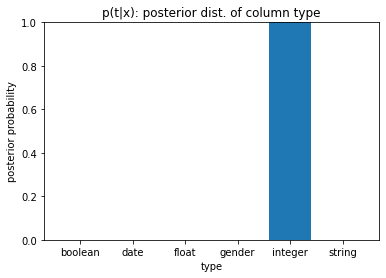

In [5]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

The column type of Time (24hr) is changed from integer to date


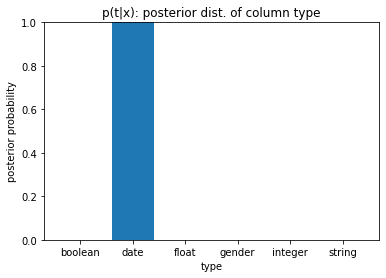

In [6]:
ptype.change_column_type_annotations([column], ['date'])

plot_column_type_posterior(ptype, column=column)

## 1.b Uniform posterior distribution

In [7]:
df = read_data(dataset_name='inspection_outcomes', header=0)

column = 'Provision type'
df_subsample = subsample_df(df, column_to_sample_from = column, sample_num = 10)
df_subsample

,Provision type
37,Children's home
140,Children's home
1090,Children's home
661,Children's home
53,Children's home
330,Children's home
1101,Children's home
1147,Children's home
1281,Children's home
906,Children's home


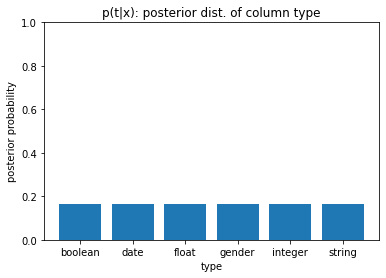

In [8]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

The column type of Provision type is changed from all identical to string


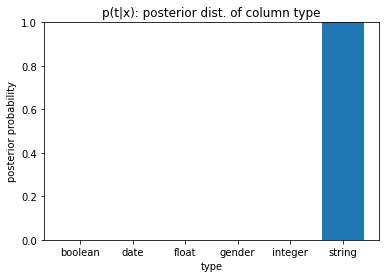

In [9]:
ptype.change_column_type_annotations([column], ['string'])
# add the character to the alphabet?

plot_column_type_posterior(ptype, column=column)

# 2. Incorrect Missing Data Prediction

In [10]:
df = read_data(dataset_name='auto')
column = 0
df_subsample = subsample_df(df, column_to_sample_from = column, sample_num = 10)
df_subsample

,0
78,2
97,1
151,1
44,1
40,0
67,-1
98,2
18,2
152,1
62,0


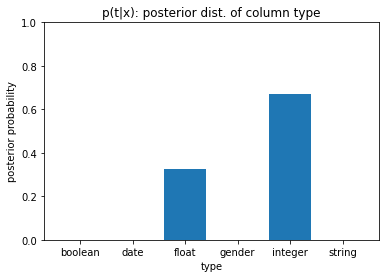

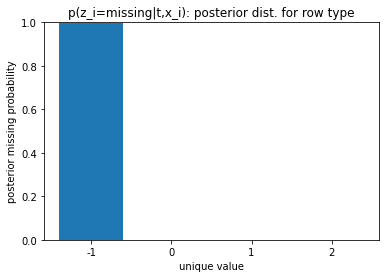

In [11]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

plot_row_type_posterior(ptype, column=column, t='missing')

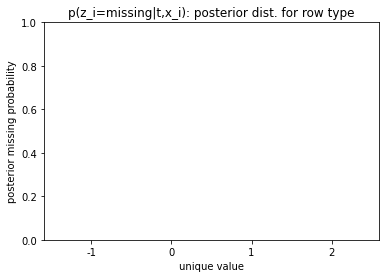

In [12]:
ptype.change_missing_data_annotations(column, ['-1'])


# update the column type posterior?
# plot_column_type_posterior(ptype, column=column)

plot_row_type_posterior(ptype, column=column, t='missing')

In [13]:
ptype.show_results([column,])

col: 0
	predicted type: integer
	posterior probs:  [6.72716250e-001 1.67147104e-087 3.27283750e-001 5.08176942e-049
 7.44185389e-124 7.44185389e-124 7.44185389e-124 7.44185389e-124
 7.44185389e-124]
	types:  ['integer', 'string', 'float', 'boolean', 'gender', 'date-iso-8601', 'date-eu', 'date-non-std-subtype', 'date-non-std'] 

	some normal data values:  ['-1', '0', '1', '2']
	their counts:  [1, 2, 4, 3]
	fraction of normal: 1.0 



# 3. a Incorrect Anomaly Prediction

In [14]:
column = 'Status'
df = read_data(dataset_name='data_gov_10151_1', header=0)
df_subsample = subsample_df(df, column_to_sample_from = column, sample_num = 20)
df_subsample

,Status
92,M
83,M
32,M
80,M
78,T
17,M
35,M
81,M
88,M
91,M


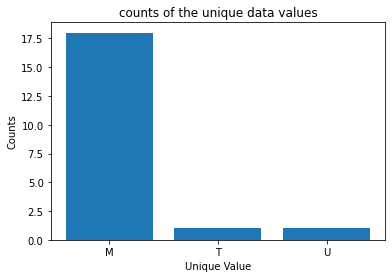

In [15]:
unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

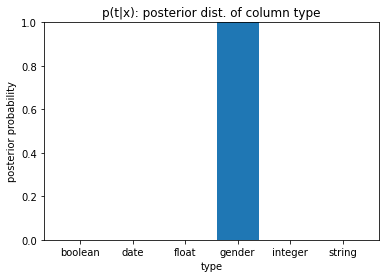

Normal Values ['M']
Anomalous Values ['T' 'U']


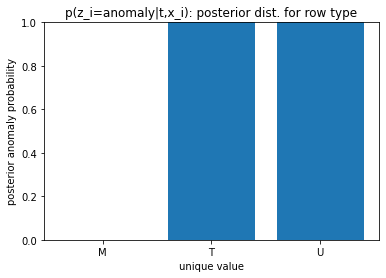

In [16]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

print('Normal Values', unique_values[ptype.normal_types[column]])
print('Anomalous Values', unique_values[ptype.anomaly_types[column]])
plot_row_type_posterior(ptype, column=column, t='anomaly')

Normal Values ['M' 'T' 'U']
Anomalous Values []


../ptype/Ptype.py:659: RuntimeWarning: invalid value encountered in true_divide
  self.p_z_columns[_column_name] = p_z / p_z.sum(axis=1)[:, np.newaxis]


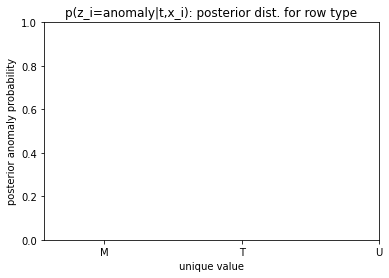

In [17]:
ptype.change_anomaly_annotations(column, ['T', 'U'])

print('Normal Values', unique_values[ptype.normal_types[column]])
print('Anomalous Values', unique_values[ptype.anomaly_types[column]])
plot_row_type_posterior(ptype, column=column, t='anomaly')

# 3.b Incorrect Anomaly Prediction

,Gender
972,Male
719,Man
979,Male
550,Woman
512,M
119,Male
1206,Male
107,Male
653,Female
1074,m


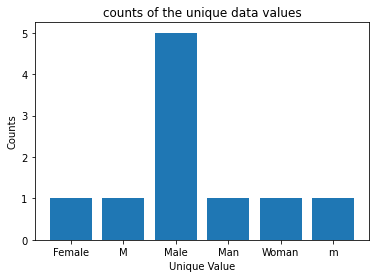

In [18]:
df = read_data(dataset_name="survey", header=0)

column = "Gender"
df_subsample = subsample_df(df, column_to_sample_from=column, sample_num=10)
display(df_subsample)

unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

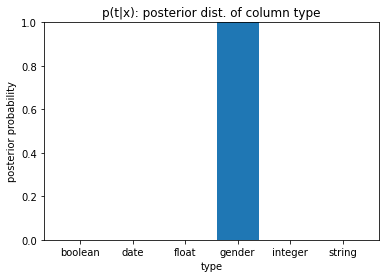

Normal Values ['Female' 'M' 'Male' 'm']
Anomalous Values ['Man' 'Woman']


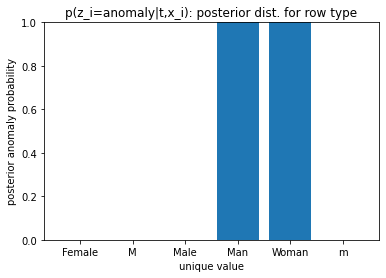

In [19]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

print("Normal Values", unique_values[ptype.normal_types[column]])
print("Anomalous Values", unique_values[ptype.anomaly_types[column]])

plot_row_type_posterior(ptype, column, t='anomaly')

# 4. Multiple Missing Data Encodings

,LRE Ages 3-5 - Full Incl #
3085,
2398,
2579,
1776,
3,16
136,38
700,-
1578,
1964,
457,-


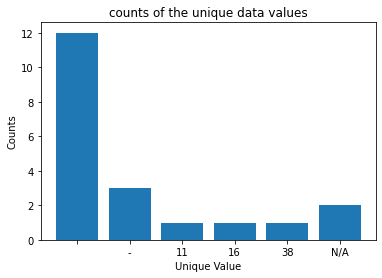

In [20]:
df = read_data("mass_6", header=0)

column = "LRE Ages 3-5 - Full Incl #"
df_subsample = subsample_df(df, column_to_sample_from=column, sample_num=20)
display(df_subsample)

unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

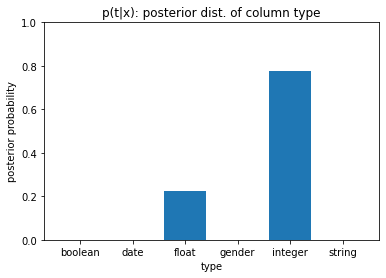

Normal Values ['11' '16' '38']
Missing Values ['' '-' 'N/A']


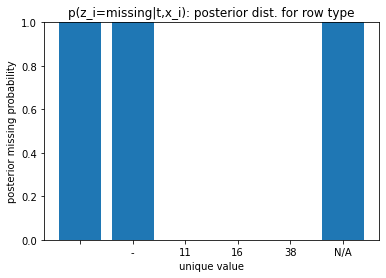

In [21]:
ptype.run_inference(_data_frame=df_subsample)

plot_column_type_posterior(ptype, column=column)

print('Normal Values', unique_values[ptype.normal_types[column]])
print('Missing Values', unique_values[ptype.missing_types[column]])

plot_row_type_posterior(ptype, column=column, t='missing')

Normal Values ['11' '16' '38']
Missing Values ['NA']


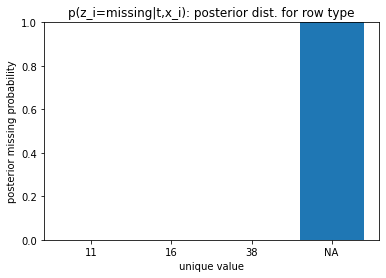

In [22]:
new_encoding = 'NA'
ptype.merge_missing_data(column, new_encoding)

unique_values, counts = np.unique(
    [str(int_element) for int_element in ptype.model.data[column].tolist()],
    return_counts=True,
)
print('Normal Values', unique_values[ptype.normal_types[column]])
print('Missing Values', unique_values[ptype.missing_types[column]])

plot_row_type_posterior(ptype, column=column, t='missing')